https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer

## Import packages

In [3]:
import pandas as pd
import json

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
import os

from nltk.sentiment import SentimentIntensityAnalyzer

In [120]:
'json' in os.listdir()[2]

True

## Import data

In [122]:
def get_json_files():
    res = []
    for file in os.listdir():
        if 'json' in file:
            res.append(file)
            
    return res

In [124]:
get_json_files()

['Amirul_json',
 'Darren_json',
 'Gradtrip_json',
 'Haoyang_json',
 'Ian_json',
 'Junkai_json',
 'Tingwei_json',
 'Xan_json']

In [10]:
data_all = []

for name in folder_names:
    file_path = ''
    file_path += name
    file_path += '/'
    file_path += 'result.json'
    data = open(file_path)
    
    data_all.append(data)

In [104]:
with open('Junkai_json/result.json', encoding="utf8") as json_file:
    data = json.load(json_file)

In [105]:
type(data['messages'][0])

dict

In [134]:
data['messages'][-1]['date']

'2021-03-29T12:05:22'

In [161]:
data['messages'][-2]['date']

'2021-03-29T12:04:01'

In [180]:
diff = datetime.strptime(data['messages'][-1]['date'], "%Y-%m-%dT%H:%M:%S") - datetime.strptime(data['messages'][-50]['date'], "%Y-%m-%dT%H:%M:%S")
diff

datetime.timedelta(seconds=38677)

In [183]:
type(diff.total_seconds() / (60 * 60))

float

In [ ]:
time = datetime.strptime(data['messages'][0]['date'][0:10], "%Y-%m-%d")

In [107]:
mydate = datetime.strptime(data['messages'][0]['date'][0:10], "%Y-%m-%d")
mydate

datetime.datetime(2018, 11, 9, 0, 0)

In [108]:
mydate.strftime("%B") + ' ' + mydate.strftime("%Y")

'November 2018'

In [99]:
data['messages']

[{'id': 18885,
  'type': 'message',
  'date': '2018-10-19T08:57:47',
  'from': 'Nelson',
  'from_id': 4675930599,
  'forwarded_from': 'Yi Heng (Rc4)',
  'text': ['Welcome to Werebear! Further instructions can be found in this pinned message. You (and everyone else) can vote who to lynch by voting on the telegram chat (except Weekends) before 11pm as long as you are alive. The person with the most votes (2 people with the top 2 highest votes if Anger Rouser is alive) would be lynched (killed regardless of identity). At midnight everyday, a broadcast would be sent to you informing you of who is lynched or killed, as well as any special actions. \n\nLynch votes will be consolidated via a countmein poll, and each person can only vote ',
   {'type': 'bold', 'text': 'once'},
   '.\n\n',
   {'type': 'bold', 'text': 'Summary of Roles'},
   ':\n\n',
   {'type': 'bold', 'text': 'Team Werebear'},
   '\n\n',
   {'type': 'bold', 'text': '2x Artistic Werebear'},
   ': Kill villagers by A Secret way 

## Cleaning functions

### Finding json files

In [133]:
get_json_files()

['Amirul_json',
 'Darren_json',
 'Gradtrip_json',
 'Haoyang_json',
 'Ian_json',
 'Junkai_json',
 'Tingwei_json',
 'Xan_json']

### Cleaning data from json

In [125]:
def get_senders(d):
    """
    Function to get senders in the chat corpus
    """
    senders = []
    for message in d:
        if message.get('from') not in senders:
            senders.append(message.get('from'))
            
    return senders

In [126]:
get_senders(data['messages'])

['Nelson', 'Jun Kai (BIZ)', None]

In [92]:
def get_messages(d, friend):
    """
    Returns a list of messages from that friend
    """
    res = []
    for message in d:
        if message.get('from') == friend:
            res.append(message['text'])
    
    for message in res:
        if type(message) != str:
            res.remove(message)
        if not message:
            res.remove(message)
    
    return res

In [109]:
get_messages(data['messages'], 'Jun Kai (BIZ)')

['Wah thats short',
 'trying to plot a map for my data',
 'its tooo hard',
 'wah how u insert the equation in markdown',
 'but ya should have CI',
 'what do u mean',
 'icic the logic quite similar to html',
 'your price scale is too big',
 'scale it down to 40 - 150 u get a better gradient',
 'and how u show the names ah?',
 'ya the avg price filter on the right',
 'ahh',
 'here is mine',
 'cant put label',
 'too many airports',
 'Idk how to make the line curve',
 'Been searching for a while',
 'how do u qualitatively compare for qns 2c for assignment 2? u cant compare log model and linear model right? all the R2 / AIC / BIC are of different scale',
 'How to compare if they are of different scale?',
 'Ya i am near the entrance',
 'where r u',
 'come have dinner with us we have seat here',
 'same ah',
 'thats all i have to explain for 2c leh',
 'feel a bit unsecured',
 'and the fact the predicted sales has negative values in it',
 'need to be firm with them',
 'tell them what they need 

In [36]:
s = ""
if s:
    print('ok')
else:
    print('not ok')

not ok


In [71]:
def get_message_count_by_month(d):
    """
    Get count of messages by month and year
    """
    res = {}
    
    for message in d:
        date_str = message['date'][0:10]
        mydate = datetime.strptime(date_str[0:10], "%Y-%m-%d")
        month_year = mydate.strftime("%B") + ' ' + mydate.strftime("%Y")
        
        # print(month_year)
        
        if month_year not in res.keys():
            res[month_year] = 1
        else:
            res[month_year] += 1
    
    return res

In [110]:
month_dict = get_message_count_by_month(data['messages'])
month_dict

{'November 2018': 160,
 'December 2018': 172,
 'February 2019': 124,
 'March 2019': 17,
 'April 2019': 251,
 'May 2019': 50,
 'July 2019': 276,
 'August 2019': 154,
 'September 2019': 217,
 'October 2019': 304,
 'November 2019': 603,
 'December 2019': 986,
 'January 2020': 622,
 'February 2020': 877,
 'March 2020': 741,
 'April 2020': 137,
 'June 2020': 5,
 'July 2020': 160,
 'August 2020': 77,
 'September 2020': 64,
 'October 2020': 71,
 'November 2020': 7,
 'December 2020': 277,
 'January 2021': 5296,
 'February 2021': 4083,
 'March 2021': 6692}

In [78]:
def plot_month_barchart(d):
    """
    Plot count of messages by month and year
    """
    plt.figure(figsize=(20,10))
    
    obj = d.keys()
    values = d.values()
    y_pos = np.arange(len(obj))
    
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, obj, rotation=90)
    plt.ylabel('Count')
    
    plt.title('Count of Messages by Year')
    plt.show()

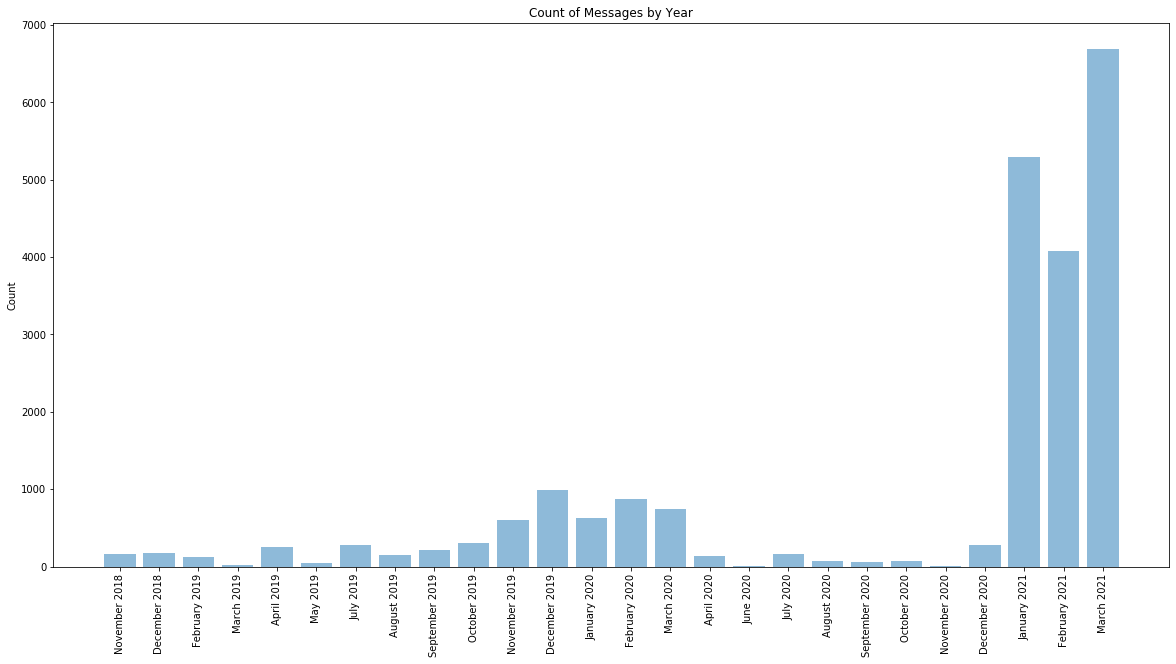

In [111]:
plot_month_barchart(month_dict)

In [131]:
def get_sender_count(d, senders):
    """
    Function to see who sends more messages
    """
    
    res = {i: 0 for i in senders }
    
    for message in d:
        for sender in res.keys():
            if message.get('from') == sender:
                res[sender] += 1
                
    return res

In [132]:
get_sender_count(data['messages'], get_senders(data['messages']))

{'Nelson': 11913, 'Jun Kai (BIZ)': 10507, None: 3}

In [146]:
def get_message_chunk_distribution(d):
    """
    Function to see if me (or friend) oftens sends in chunks
    """
    res = {}  # result should be a dictionary of dictionaries
    
    for message in d:
        if message.get('from') not in res.keys():
            res[message.get('from')] = {}
            
    for sender in res.keys():  # Iterate over all available senders
        count = 0
        for message in d:  # go through all messages again
            if message.get('from') == sender:
                count += 1  # increment by 1 if it's the same sender
            else:
                if count not in res[sender].keys():
                    res[sender][count] = 1
                else:
                    res[sender][count] += 1
                count = 0  # reset to 0
    
    return res

In [155]:
def remove_chunks(d, val=4):
    """
    Remove chunks from result if they are less than 4
    """
    return dict((key, value) for key, value in d.items() if key >= val)

In [186]:
def get_avg_message_chunk(d):
    total = 0  # store total number of messages
    chunks = 0
    for key in d.keys():
        total += key * d[key]
        chunks += d[key]
        
    return total / chunks

In [160]:
chunk_dict = get_message_chunk_distribution(data['messages'])

In [188]:
nel_dict = dict(sorted(chunk_dict['Nelson'].items()))
nel_dict = remove_chunks(nel_dict)
nel_dict  # do I want to plot this??

jk_dict = dict(sorted(chunk_dict['Jun Kai (BIZ)'].items()))
jk_dict = remove_chunks(jk_dict)
jk_dict  # do I want to plot this??

{4: 408, 5: 135, 6: 70, 7: 38, 8: 4, 9: 8, 10: 3, 11: 1, 12: 2, 13: 1}

In [187]:
get_avg_message_chunk(nel_dict)

5.115766262403528

In [189]:
get_avg_message_chunk(jk_dict)

4.7388059701492535

In [201]:
def get_ignored_count_per_month(d, sender, time=4):
    """
    Check how many times my friend (or me) ignores
    Default time to respond is 4 hours
    """
    res = 0  # initialise as 0
    
    started = False
    
    initial_time = 0  # set to avoid local unbound error
    
    for message in d:
        if message.get('from') != sender and started == False:
            started = True
            initial_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S") # datetime object
        if message.get('from') == sender:
            started = False
            end_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S")
            
            if initial_time != 0:
                diff = end_time - initial_time
                hours = diff.total_seconds() / (60 * 60)
            
                if hours > 4:
                    res += 1
                
    return res

In [202]:
get_ignored_count_per_month(data['messages'], "Jun Kai (BIZ)")

559

In [203]:
get_ignored_count_per_month(data['messages'], "Nelson")

559

In [198]:
def get_avg_response_time(d, sender):
    """
    Get average response time for a person (in hours)
    """
    time = 0
    count = 0
    
    started = False
    initial_time = 0  # set to avoid local unbound error
    
    
    for message in d:
        if message.get('from') != sender and started == False:
            started = True
            initial_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S") # datetime object
        if message.get('from') == sender:
            started = False
            end_time = datetime.strptime(message.get('date'), "%Y-%m-%dT%H:%M:%S")
            
            if initial_time != 0:
                diff = end_time - initial_time
                hours = diff.total_seconds() / (60 * 60)
                
                time += hours
                count += 1
                
    return time / count

In [199]:
get_avg_response_time(data['messages'], "Jun Kai (BIZ)")

3.222188593847492

In [200]:
get_avg_response_time(data['messages'], "Nelson")

2.8465703576193278

### Creating text corpus

1. Create corpus for text
2. Remove stopwords

In [221]:
data['messages'][3].get('text')

'just need to append'

In [224]:
def create_corpus(d, sender='Nelson'):
    res = ""
    
    for message in d:
        if message.get('from') == sender:
            if type(message.get('text')) == str:
                res += message.get('text')  # sometimes if I send code it's a list
                res += " "
            
    return res

In [226]:
corpus = create_corpus(data['messages'])
corpus

'wheee finally done with the code just need to append hehe took me 2hr man all the data cleaning tho still ok Tableau ok what I think doing it in python is just a bonus Need to plot the confidence interval right   or this lol but they give p value automatically if we meet I can show u haha or you can find out google latex jupyter markdown subscript weird i have no bukit timah now filter ah put towns into labels on the marks huhhh you just need the airport names but looks good if the lines can be curved it may look better Ya say that Then go ahead and compare anyway Dh now ? Wah Come over leg I have no one I can trust Arnd the center Later go my room  Ayy Now left project sigh my group hasn\'t started on the report also dk what to write T_T do you think we have to look at adjusted r2?  fresh new data Yeah At least now got bukit timah From across 8 datasets combined Ya different months  can u send me the google maps thingy where u input the town name and they show the lat long Haha ok Ju

In [281]:
'ah' in stopwords

True

In [303]:
stopwords.append("(")  # added ah, hmm, ok, wah, go, ' ', u, hehe, haha, ',', '?', ''s'
# ':', 'im', 'yea', "n't", "(", 

In [304]:
words = nltk.word_tokenize(corpus)
words = [w for w in words if w.lower() not in stopwords]  # remove stopwords

In [305]:
words[:100]

['wheee',
 'finally',
 'done',
 'code',
 'need',
 'append',
 'took',
 '2hr',
 'man',
 'data',
 'cleaning',
 'tho',
 'still',
 'Tableau',
 'think',
 'python',
 'bonus',
 'Need',
 'plot',
 'confidence',
 'interval',
 'right',
 'lol',
 'give',
 'p',
 'value',
 'automatically',
 'meet',
 'show',
 'find',
 'google',
 'latex',
 'jupyter',
 'markdown',
 'subscript',
 'weird',
 'bukit',
 'timah',
 'filter',
 'put',
 'towns',
 'labels',
 'marks',
 'huhhh',
 'need',
 'airport',
 'names',
 'looks',
 'good',
 'lines',
 'curved',
 'may',
 'look',
 'better',
 'say',
 'ahead',
 'compare',
 'anyway',
 'Dh',
 'Come',
 'leg',
 'one',
 'trust',
 'Arnd',
 'center',
 'Later',
 'room',
 'Ayy',
 'left',
 'project',
 'sigh',
 'group',
 'started',
 'report',
 'also',
 'dk',
 'write',
 'T_T',
 'think',
 'look',
 'adjusted',
 'r2',
 'fresh',
 'new',
 'data',
 'Yeah',
 'least',
 'got',
 'bukit',
 'timah',
 'across',
 '8',
 'datasets',
 'combined',
 'different',
 'months',
 'send',
 'google',
 'maps',
 'thingy']

In [306]:
fd = nltk.FreqDist(words)
fd

FreqDist({'think': 456, 'like': 354, 'also': 329, 'buy': 234, 'get': 223, 'need': 212, 'got': 212, 'maybe': 205, 'good': 200, 'one': 196, ...})

In [307]:
fd.most_common(10)

[('think', 456),
 ('like', 354),
 ('also', 329),
 ('buy', 234),
 ('get', 223),
 ('need', 212),
 ('got', 212),
 ('maybe', 205),
 ('good', 200),
 ('one', 196)]

In [310]:
type(fd.tabulate(15))

think  like  also   buy   get  need   got maybe  good   one   cuz right  sell  time   lol 
  456   354   329   234   223   212   212   205   200   196   196   195   195   181   179 


NoneType

In [236]:
fd["python"]

45

In [311]:
fd["tableau"]

7

In [243]:
fd["shopee"]

45

In [244]:
lower_fd = nltk.FreqDist([w.lower() for w in fd])

In [245]:
lower_fd["shopee"]  # 2 variations for shopee

2

In [248]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(data['messages'][0]['text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [250]:
sia.polarity_scores(data['messages'][100]['text'])

{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}

In [255]:
def get_sentiment_score(d, sender='Nelson'):
    """
    Return compound score using NLTK's default sentiment analyzer
    """
    sia = SentimentIntensityAnalyzer()
    total = 0
    count = 0 
    
    for message in d:
        if message.get('from') == sender and type(message.get('text')) == str:
            total += sia.polarity_scores(message.get('text'))['compound']
            count += 1
    
    return total / count

In [256]:
get_sentiment_score(data['messages'])  # Nelson's sentiment

0.05374437510685562

In [257]:
get_sentiment_score(data['messages'], 'Jun Kai (BIZ)')

0.033988672922251995

In [259]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [262]:
def get_sentiment_score_extra(d, sender='Nelson'):
    """
    Return compound score using NLTK's default sentiment analyzer
    1. Filter for length
    2. Filter for stopwords
    """
    sia = SentimentIntensityAnalyzer()
    stopwords = nltk.corpus.stopwords.words("english")
    
    total = 0
    count = 0 

    for message in d:
        if message.get('from') == sender and type(message.get('text')) == str:
            text = message.get('text').split()  # default split is whitespace
            text = [w for w in text if w.lower() not in stopwords]  # remove stopwords
            if len(text) >= 6:  # at least 6 words
                text_string = " ".join(text)
                total += sia.polarity_scores(message.get('text'))['compound']
                count += 1
    
    return total / count

In [263]:
get_sentiment_score_extra(data['messages'])

0.1264820149875103

In [264]:
get_sentiment_score_extra(data['messages'], 'Jun Kai (BIZ)')

0.07603193629505428

In [265]:
def get_sentiment_count_extra(d, sender='Nelson'):
    """
    Return count score using NLTK's default sentiment analyzer
    1. Filter for length
    2. Filter for stopwords
    """
    sia = SentimentIntensityAnalyzer()
    stopwords = nltk.corpus.stopwords.words("english")
    
    scores = {
        'positive': 0,
        'negative': 0,
        'neutral': 0
    }
    
    for message in d:
        if message.get('from') == sender and type(message.get('text')) == str:
            text = message.get('text').split()  # default split is whitespace
            text = [w for w in text if w.lower() not in stopwords]  # remove stopwords
            if len(text) >= 6:  # at least 6 words
                text_string = " ".join(text)
                score = sia.polarity_scores(message.get('text'))['compound']
                
                if score > 0:
                    scores['positive'] += 1
                elif score < 0:
                    scores['negative'] += 1
                else:
                    scores['neutral'] += 1
                    
    return scores

In [266]:
get_sentiment_count_extra(data['messages'])

{'positive': 505, 'negative': 207, 'neutral': 489}

In [267]:
get_sentiment_count_extra(data['messages'], 'Jun Kai (BIZ)')

{'positive': 420, 'negative': 252, 'neutral': 521}

In [ ]:
def get_top_10_words(d, sender='Nelson'):
    """
    Return top 10 most commonly used words
    """
    fd = nltk.FreqDist(words)

**TODO:** 

1. filter messages with at least a certain length
2. remove stopwords?
3. try out count vectorizer
4. update stopwords
5. include specific vocab in model
6. do I really want a wordcloud

### Create friend report

In [ ]:
def get_friend_report()